# TPT pipeline with ERA5

In [72]:
import sys
sys.path.append("../..")

In [101]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import netCDF4 as nc
import feature_template
import feature_stratosphere
from importlib import reload
import sys 
import os
from os import mkdir, makedirs
from os.path import join,exists
from importlib import reload
import pickle
import tpt_utils
from sklearn.cluster import KMeans, MiniBatchKMeans
from datetime import datetime
from calendar import monthrange

# Set up experiment

In [74]:
topic_dir = "/scratch/jf4241/ecmwf_data/"
filedict = dict({
    "data": dict({
        "ra": dict({
            "traj": dict({
                "dir": join(topic_dir, "era5_data", "raw_data", "2022-08-14"), # Directory with possibly many files
            }),
            "feat_all": dict({
                "dir": join(topic_dir, "era5_data", "features_all", "2022-08-15"),
                "filename": "era5_features_all.nc",
            }),
            "feat_tpt": dict({
                "dir": join(topic_dir, "era5_data", "features_tpt", "2022-08-15",),
                "filename": "era5_features_tpt.nc",
            }),
        }),
        # TODO: add another directory for S2S hindcasts
    }),
    "results": dict({
        "dir": join(topic_dir, "results", "tpt_quantities", "2022-08-15")
    })
})

In [75]:
# Create the directories if they don't exist already
for src in list(filedict["data"].keys()):
    for data_stage in ["traj","feat_all","feat_tpt"]:
        path = filedict["data"][src][data_stage]["dir"]
        if not exists(path):
            makedirs(path, exist_ok=True)
path = filedict["results"]["dir"]
if not exists(path): makedirs(path, exist_ok=True)

## Read database and compute features. 

In [189]:
ds = xr.open_mfdataset(
    [join(filedict["data"]["ra"]["traj"]["dir"], f"{datestr}.nc")
          for datestr in ["2002-10","2002-09","2002-11","2002-12","2001-07","2003-01","2003-02","2003-03"]],
)

In [ ]:
reload(feature_stratosphere)

In [194]:
feat_strat = feature_stratosphere.WinterStratosphereFeatures()
feat_strat.set_event_seasonal_params()
feat_strat.set_ab_code()

In [192]:
tda = feat_strat.time_observable(ds)

szn_start_same_year[0] = 2001-10-01T00:00:00.000000


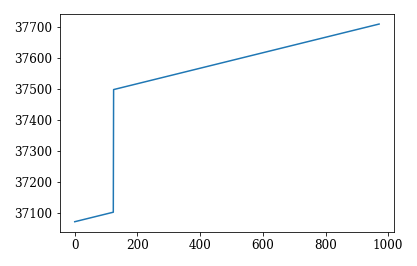

In [193]:
plt.plot(tda.sel(time_type="t_abs"))